# Progress

The mainly progress for the last two weeks is 1)visualization code(See helper.R). 2) literature review

## visualization

a) visualize the trend using Linear Regression  
b) visualize the correlation between sst and chlA  
c) draw the contour line(we dont have the SSL data so we use the Chl data)
d) fill the missing value(5 std away from the mean)
e) discription statistic

## Literature review
There is strong connection between Ch and SST, but the relationship could differ in region, which aligns with our observation[[1]](#1). Second paper[[2]](#2) contains the method to get the movement from consecutive 2D matrix. 

# Demonstration


In [1]:
# load data
library(ncdf4)
library(ggplot2)
library(lubridate)
library(gamm4)
library(mgcv)
library(rjson)
library(rray)
source("../helper.R")

In [2]:

database <- '/home/jianj0c/dataset/redsea/'

chl_data_folder  <- 'Chlorophyll/8-Days_composite/'
chl_dir_path <- paste(database,chl_data_folder,"Aqua_MODIS_chloA_8_Days_Composite.2003_2022.nc",sep="")
chl_nc_obj <- nc_open(chl_dir_path)
chl_T_array <- ncvar_get(chl_nc_obj,"chlorophyllA")

sst_data_folder  <- 'SST/Aqua_MODIS_8_days_L3m_4km_SST/'
sst_dir_path <- paste(database,sst_data_folder,"Aqua_MODIS_sstd_8day_Composite.2003_2022.nc",sep="")
sst_nc_obj <- nc_open(sst_dir_path)
sst_T_array <- ncvar_get(sst_nc_obj,"sstMasked")

longitude<-chl_nc_obj$dim[[1]]$vals
latitude <- chl_nc_obj$dim[[2]]$vals
timestamp_ch <- chl_nc_obj$dim[[3]]$vals
timestamp_sst <- sst_nc_obj$dim[[3]]$vals
## configuration
config<-fromJSON(file="../config.json")
task_paral_maximum<-parallel::detectCores()-5

## statistic discription of SST and CHL#
### SST(Before filter outlier)

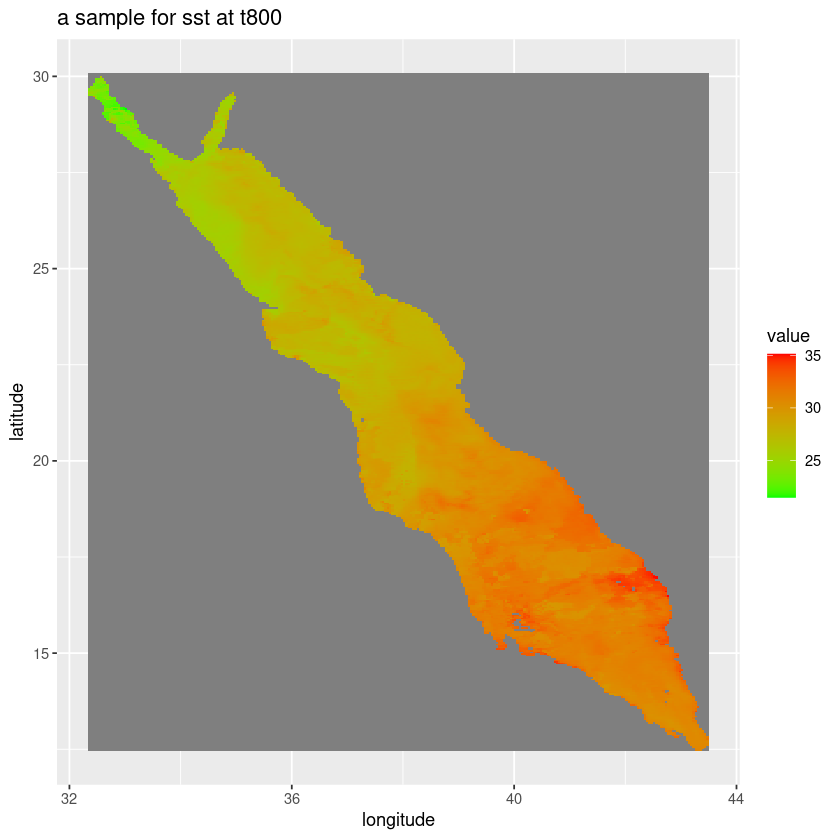

         Min.       1st Qu.        Median          Mean       3rd Qu. 
           15            26            28            28            30 
         Max.     Valid.Ent Valid.percent           Std 
           40      20969524            21             3 


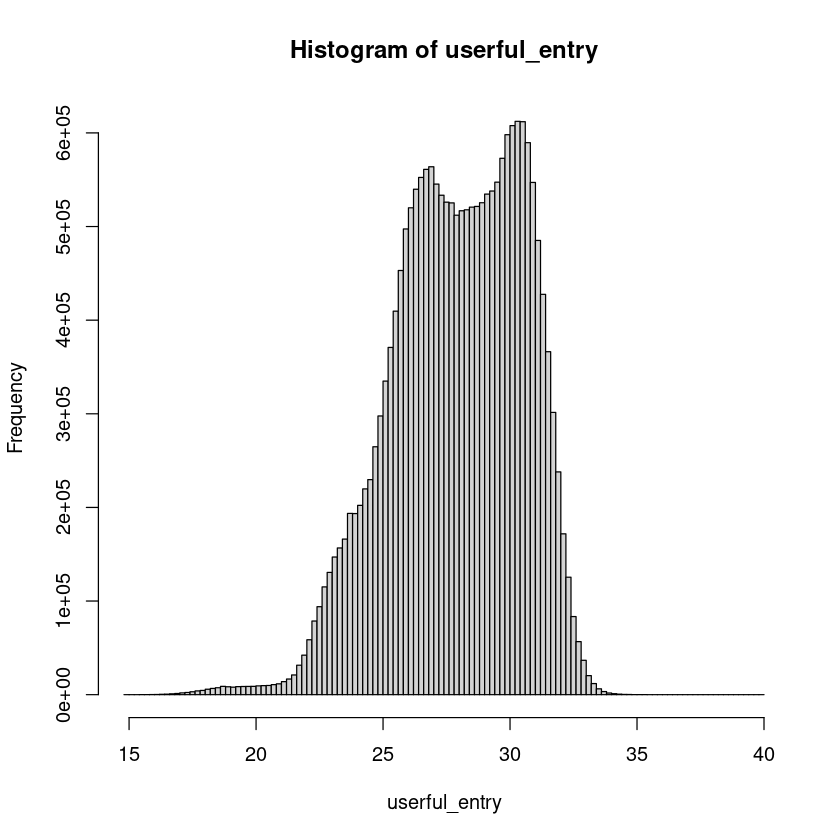

In [143]:
visualize_frame_ggplot(sst_T_array[,,800],latitude,longitude,title="a sample for sst at t800")
helper_describe(sst_T_array)

### SST(After filter outlier)

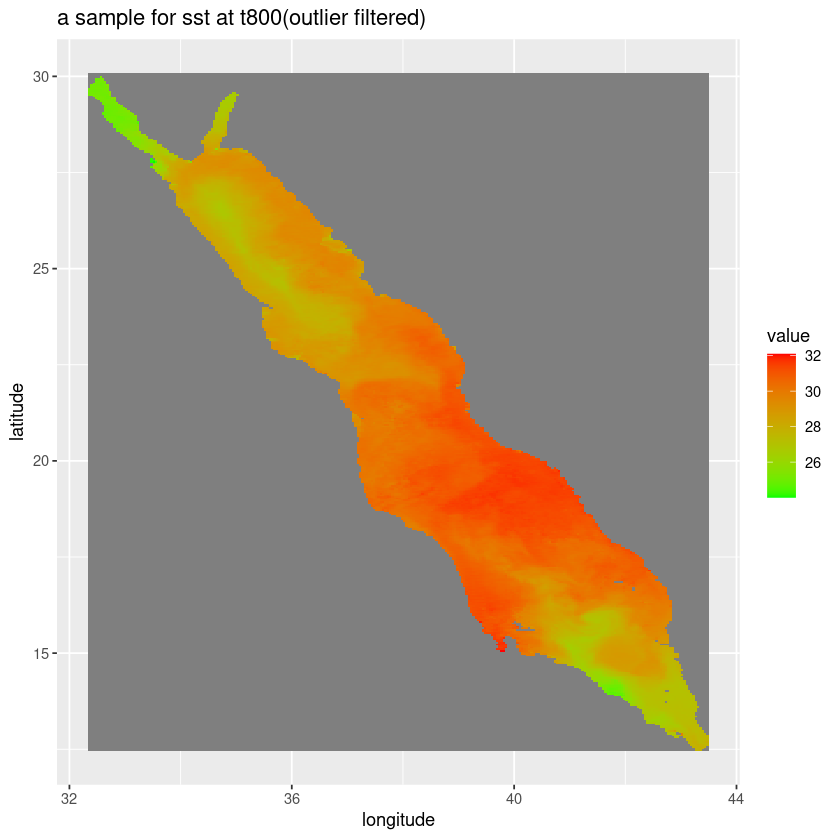

         Min.       1st Qu.        Median          Mean       3rd Qu. 
           15            26            28            28            30 
         Max.     Valid.Ent Valid.percent           Std 
           40      20969523            21             3 


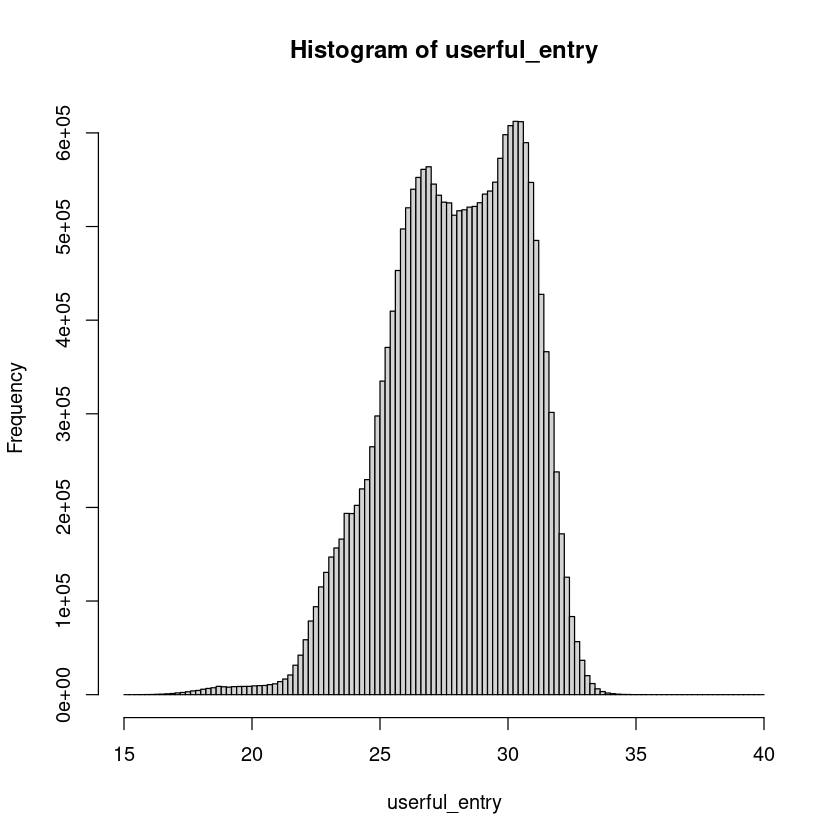

In [144]:
sst_T_array_filter_outlier<-sst_T_array

sst_T_array_filter_outlier[pipeline_filter_for_outlier(sst_T_array,5)]=NA
visualize_frame_ggplot(sst_T_array_filter_outlier[,,819],latitude,longitude,title="a sample for sst at t800(outlier filtered)")
helper_describe(sst_T_array_filter_outlier)

### ChA(Before filter outlier)

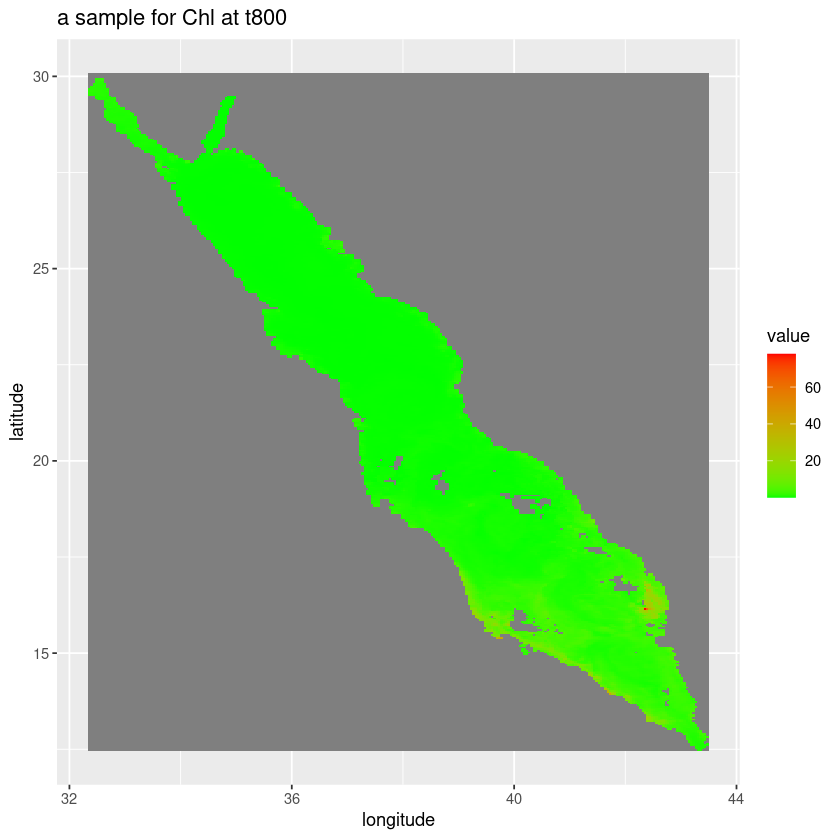

         Min.       1st Qu.        Median          Mean       3rd Qu. 
            0             0             0             1             0 
         Max.     Valid.Ent Valid.percent           Std 
          100      11315119            11             2 


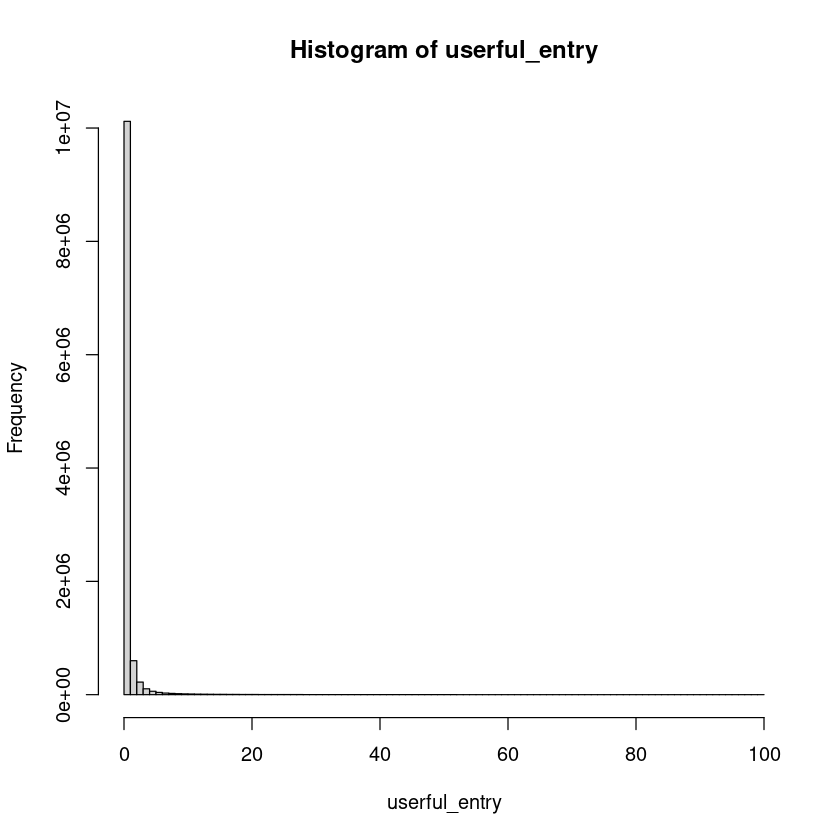

In [145]:
visualize_frame_ggplot(chl_T_array[,,819],latitude,longitude,title="a sample for Chl at t800")
helper_describe(chl_T_array)

### ChA(After filter outlier)
we can see from the plot, there is a lot of outlier in ChA data. from a [source](https://oceantracks.org/library/oceanographic-factors/chlorophyll) the range for ChA should be 0-50. Those outliers in Chl data distort the plot a lot.

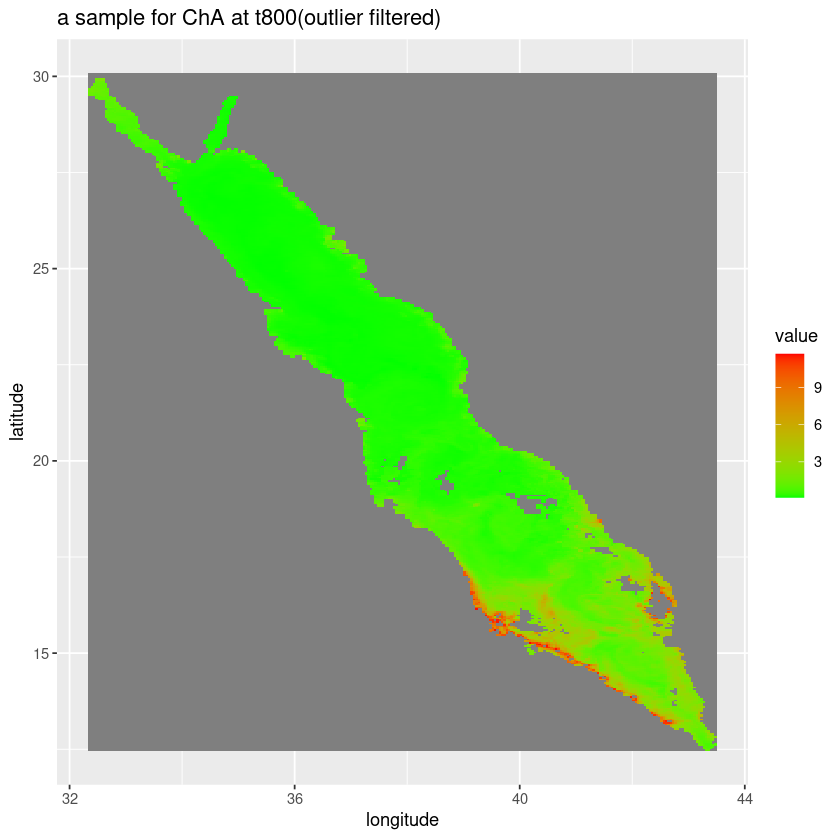

         Min.       1st Qu.        Median          Mean       3rd Qu. 
            0             0             0             0             0 
         Max.     Valid.Ent Valid.percent           Std 
           12      11242030            11             1 


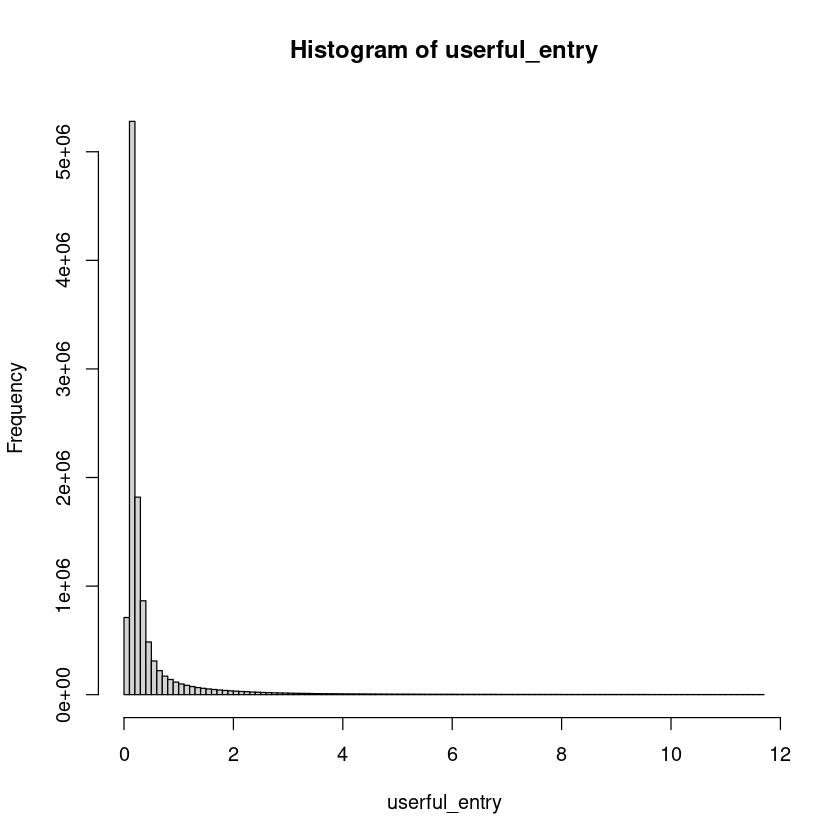

In [146]:
chl_T_array_filter_outlier<-chl_T_array
chl_T_array_filter_outlier[pipeline_filter_for_outlier(chl_T_array,5)]=NA
visualize_frame_ggplot(chl_T_array_filter_outlier[,,819],latitude,longitude,title="a sample for ChA at t800(outlier filtered)")
helper_describe(chl_T_array_filter_outlier)

## trend regression
to see the linear trend in last ten year, we do the linear regression. We can see global warming from the Linear trend on surface temperature. However, there is no consistent for the linear trend on ChlA which suggests the Chl's dynamic are more complicated.

In [ ]:
chl_trend_matrix<-reducer_trend(chl_T_array_filter_outlier,"Chl",25)
sst_trend_matrix<-reducer_trend(sst_T_array_filter_outlier,"SST",25)

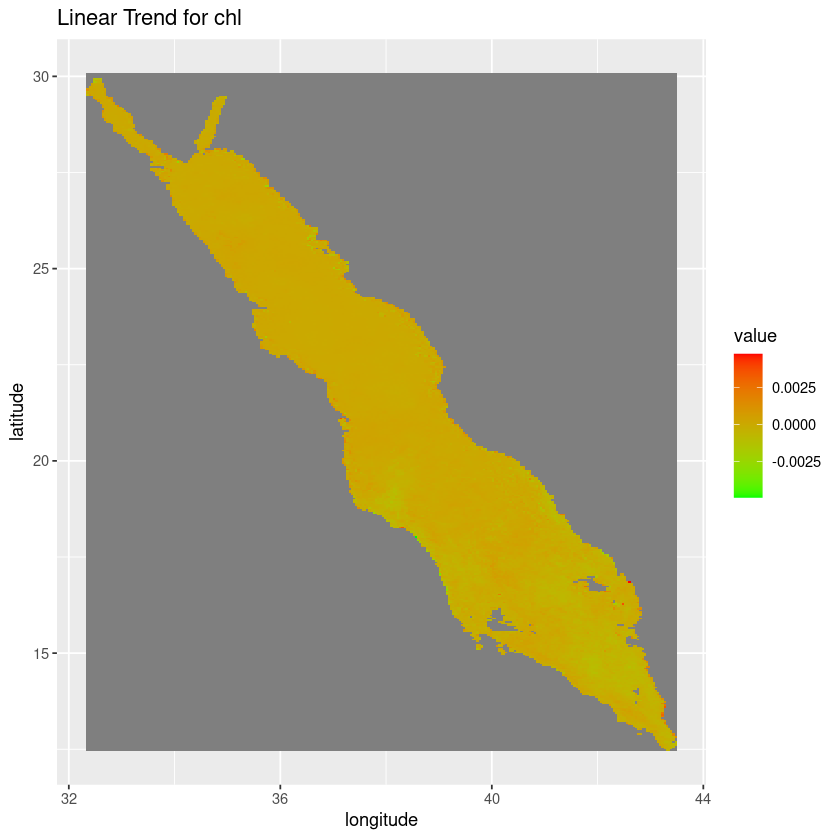

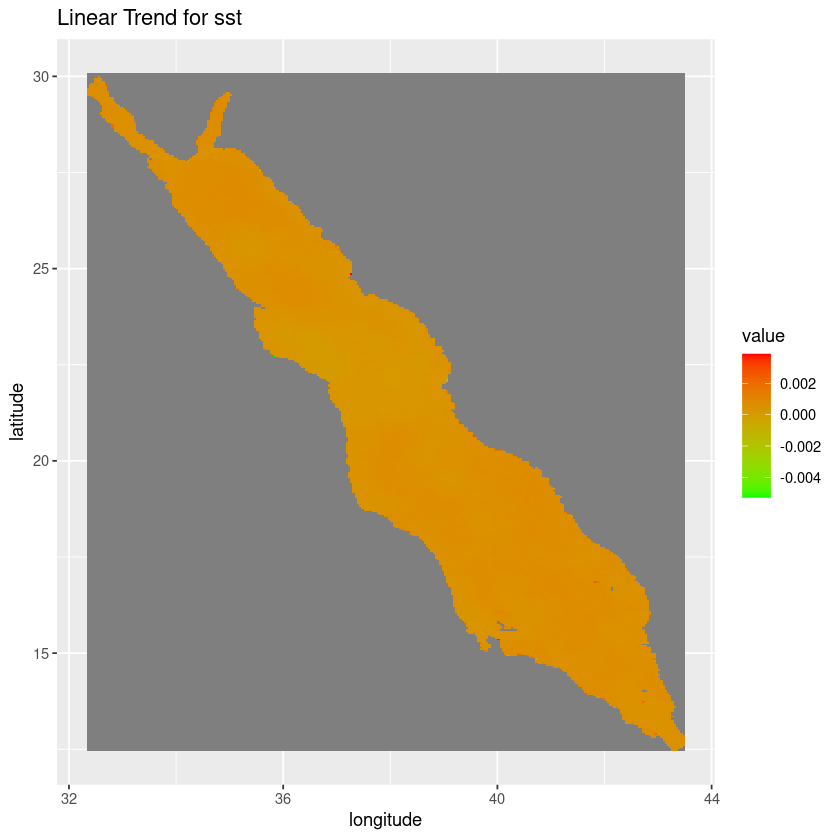

In [142]:
visualize_frame_ggplot(chl_trend_matrix,latitude,longitude,title="Linear Trend for chl")
visualize_frame_ggplot(sst_trend_matrix,latitude,longitude,title="Linear Trend for sst")

## corelation between chl and sst
The correlation between Chl and sst is kind of strong. The correlation differ in regions and shed the light on how we design the feature to predict the Chl dynamic.

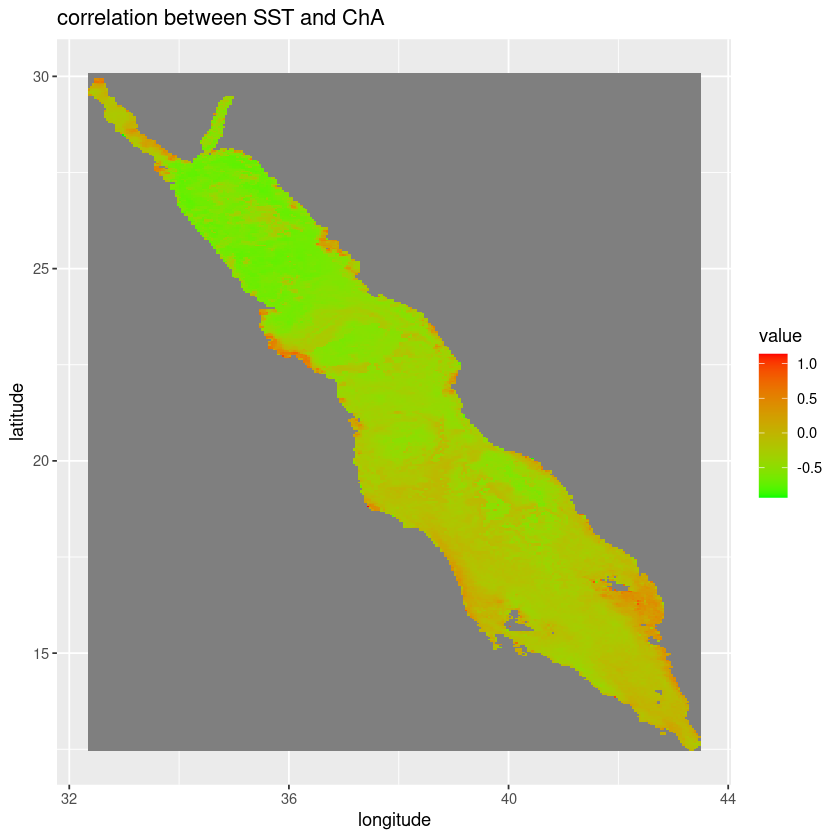

In [141]:
correlation_matrix<-reducer2_correlation(chl_T_array_filter_outlier[,,1:700],
    sst_T_array_filter_outlier[,,1:700])
visualize_frame_ggplot(correlation_matrix,latitude,longitude,,title="correlation between SST and ChA")

## draw edge
draw edge in R just require one extra code(see this [source](https://app.datacamp.com/workspace/w/cc00ae12-bd4c-4b70-aa9d-e5ab1ab8b5e1/edit?file=notebook.ipynb))
])

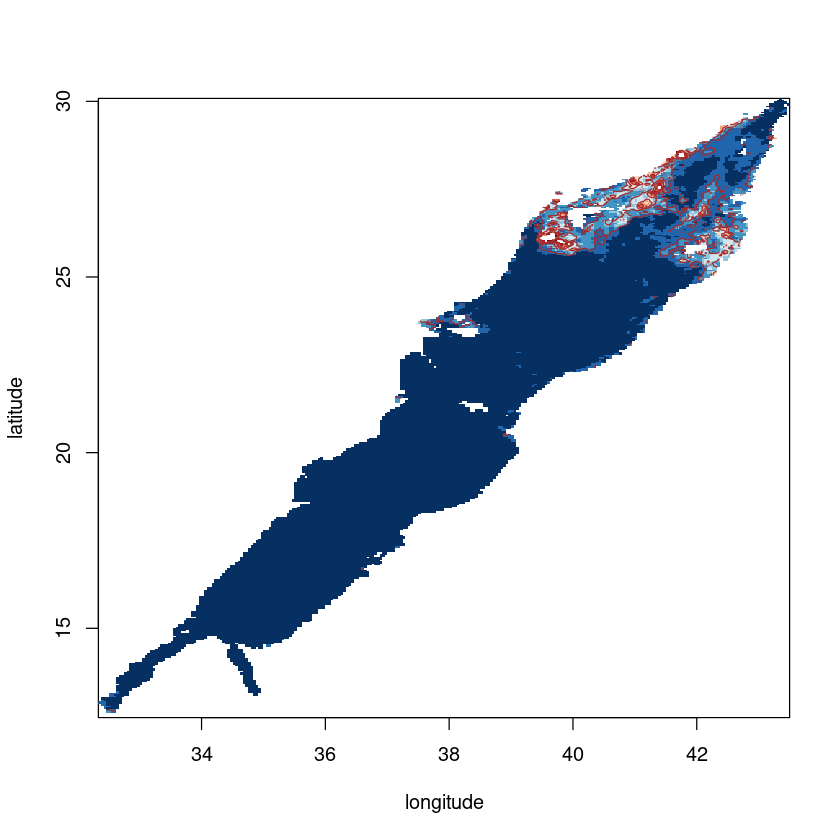

In [149]:
visualize_frame_level(chl_T_array_filter_outlier[,,821],latitude,longitude,nlevel=5)

# References
<a id="1">[1]</a> 
Bellido J J, Baez J C, Souviron-Priego L, et al. Atmospheric indices allow anticipating the incidence of jellyfish coastal swarms[J]. Mediterranean Marine Science, 2020, 21(2): 289-297.   


<a id="2">[2]</a>
Heitz D, Mémin E, Schnörr C. Variational fluid flow measurements from image sequences: synopsis and perspectives[J]. Experiments in fluids, 2010, 48(3): 369-393.
